In [1]:
import pandas
import numpy as np

In [2]:
df = pandas.read_csv('bench.txt')
#df = df[df.length == 0.14]


In [5]:
length_values = np.arange(8, 13, 0.5)
k0 = range(50, 1500, 50)

X0 = np.array(length_values)
Y0 = np.array(k0)

zz = np.ones(shape=(len(X0), len(Y0)), dtype=float)


In [6]:
for i in range(len(X0)):
    for j in range(len(Y0)):
        zz[i][j] = float(df[df.length==X0[i]/100][df.radfold==Y0[j]]['Jv'].values[0])

Populating the interactive namespace from numpy and matplotlib


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


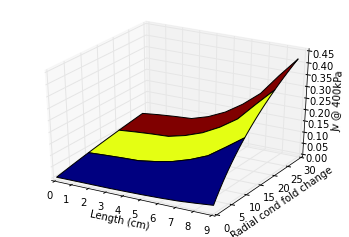

In [7]:
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.array(range(len(X0)))
Y = np.array(range(len(Y0)))
#X = np.array((1/10.,1/4.,1/2.,1,2,8,16,25))
#Y = np.array((1/10.,1/4.,1/2.,1,2,8,16,25))

X, Y = np.meshgrid(X, Y, indexing='ij')

Z = np.array(zz)
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_ylabel('Radial cond fold change')
ax.set_xlabel('Length (cm)')
ax.set_zlabel('Jv @ 400kPa')

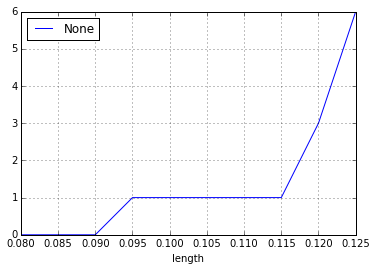

In [50]:
df.plot('length', 'i1')

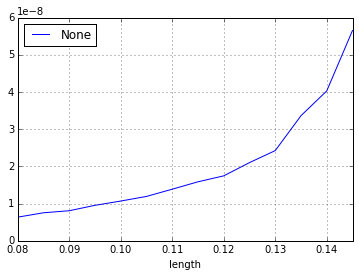

In [38]:
df.plot('length', 'volume')

In [51]:
dr = df[df.radfold==1000]

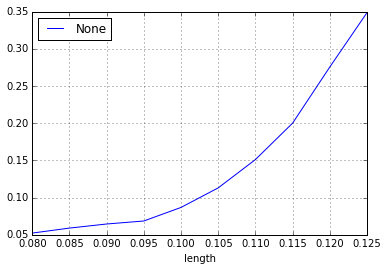

In [52]:
dr.plot('length', 'Jv')

In [1]:
l = {}
l['median'] = ([x/100. for x in range(0,101,5)],
            [0.0, 0., 0., 0.00032, 0.000835, 0.00076, 0.002665, 0.003825, 0.006775,
             0.00907, 0.01282, 0.01193, 0.01129, 0.010465, 0.015035, 0.01016, 0.016275,
             0.01536, 0.05308, 0.07251,0.07971])
l['low']= ([x/100. for x in range(0,101,5)],
            [0.0, 0., 0., 0.00032, 0.00032, 0.000515, 0.002252, 0.001312, 0.003844,
             0.006908, 0.005966, 0.00089, 0.001751, 0.001921, 0.002584, 0.003325, 0.005306,
             0.009524, 0.046133, 0.056527,0.074152])
l['high']= ([x/100. for x in range(0,101,5)],
            [0.0, 0., 0., 0.00032, 0.001465, 0.0012, 0.003725, 0.007105, 0.01336,
             0.009486, 0.02051, 0.022757, 0.023004, 0.027506, 0.0215, 0.02938, 0.039895,
             0.050636, 0.062388, 0.07646,0.09448])

def length_law(length, type='median'):
    print 'Length law at ', length
    length=0.13
    x, y = l[type]

    return [xx*length for xx in x], y

# radial
def radial(v=300):
    xr = [0., 0.015, 0.03, 0.045, 0.06, 0.075, 0.09, 0.105, 0.135, 0.15, 0.16]
    yr = [v]*len(xr)
    return xr, yr


In [ ]:
from hydroroot.main import hydroroot_mtg
length=11.5
length_data = length_law(length, type='high')

seed = 4
g, surface, volume = hydroroot_mtg(
seed=seed,
primary_length=length,
length_data=length_data,
nude_length=0.02,
)

In [ ]:
%gui qt
from hydroroot import display as dis

#%gui qt
from openalea.plantgl.all import *
#for g in mtgs:
scene = dis.plot(g, r_base=1, r_tip=5e-1, prop_cmap='tip_length', lognorm=False)
    #display(PlantGL(scene))
Viewer.display(scene)